<a href="https://colab.research.google.com/github/AureliaWambui19/Prediction-on-who-opens-a-bank-account/blob/main/MMoringa_Data_Science_Core_W2_Independent_Project_2020_Wambui_Aurelia_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Defining the Question

1.1 Specifying the question

In [ ]:
# Research on financial inclusion in  Kenya, Rwanda, Tanzania and Uganda  
# Access to bank accounts has been regarded as an indicator of financial inclusion
# Provide insights into some of the key demographic factors that might drive individual's financial outcomes.

1.2 Defining the Metric for Success

1.3 Understanding the context

In [ ]:
# Variable Definitions  for this notebook/project : http://bit.ly/VariableDefinitions 
# Financial Inclusion remains one of the main obstacles to economic and human development in Africa.
# For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population)
 #have access to or use a commercial bank account.
# Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. 

# Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, 
# banks still play a pivotal role in facilitating access to financial services. 
 # their credit-worthiness and improve their access to other financial services.  
# Therefore, access to bank accounts is an essential contributor to long-term economic growth.
# So in this notebook/project i am going to
#figure out how we can predict which individuals are most likely to have or use a bank account

1.4 Recording the Experimental Design

In [ ]:
# For success of  this project i am going to do certain tasks
#Find and deal with outliers, anomalies, and missing data within the dataset
# Conduct Exploratory Data Analysis
# Univariate, Bivariate and Multivariate analysis
# Create Visualizations
# Apply Reduction techniques 
# Create a Mutiple Regression model for predictions
# Challenge my  solution by providing insights on improvements can be done

1.5Data Relevance

In [ ]:
# The data provided fits the context of this project
# It contains crucial variables that can be used for  prediction on which individuals are most likely to have or use a bank account
# The main dataset contains demographic information and what financial services are used by individuals across 4 countries namely Kenya, Rwanda, Tanzania, and Uganda .
# This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:
# FinAccess Kenya 2018: https://fsdkenya.org/publication/finaccess2019/
# Finscope Rwanda 2016: http://www.statistics.gov.rw/publication/finscope-rwanda-2016
# Finscope Tanzania 2017:  http://www.fsdt.or.tz/finscope/
# Finscope Uganda 2018: http://fsduganda.or.ug/finscope-2018-survey-report/ 
# Dataset Files provided are two

                       # Variable Definitions: http://bit.ly/VariableDefinitions 
                       # Dataset: http://bit.ly/FinancialDataset

#  2.Reading the dataset

2.1 Importing libraries to be used in this project/notebook

In [ ]:
# Importing libraries we will use for our analysis

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import sklearn as sk

import pandas_profiling as pp

from sklearn import model_selection

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.2 Loading the dataset

In [ ]:
# Loading the dataset


Finance = pd.read_csv("http://bit.ly/FinancialDataset")

2.3 Viewing the dataset

In [ ]:
# viewing the first 6 entries in the dataset

Finance.head(6)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [ ]:
# # viewing the last 6 entries in the dataset

Finance.tail(6)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23518,Uganda,2018,uniqueid_2111,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# Checking whether each column has an appropriate datatype
Finance.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
# Determining the no. of records in our dataset
#Finance.shape
print('This dataset has ' + str(Finance.shape[0]) + ' rows and ' +  str(Finance.shape[1]) + ' columns' )

This dataset has 23524 rows and 13 columns


In [ ]:
# checking the dataset information
Finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


# Tyding the datasset

In [ ]:
# checking the column names
# Renaming the columns: 
Finance.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# Renaming 2 columns namely Level of Educuation and 'The relathip with head' which have typos
Finance.rename(columns={'The relathip with head':'The relationship with head'}, inplace=True)
Finance.rename(columns={'Level of Educuation':'Level of Education'}, inplace=True)
#Checking columns to verify whether the 2 columns have been renamed
print(Finance.columns)


Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relationship with head', 'marital_status',
       'Level of Education', 'Type of Job'],
      dtype='object')


In [ ]:
# Making all columns to be in upper case to make them uniform and removing spaces that exists in some columns

Finance.columns = Finance.columns.str.upper().str.replace(" ", "_")

In [ ]:
#Checking columns to verify whether they are in uper case and spaces have been removed
print(Finance.columns)

Index(['COUNTRY', 'YEAR', 'UNIQUEID', 'HAS_A_BANK_ACCOUNT', 'TYPE_OF_LOCATION',
       'CELL_PHONE_ACCESS', 'HOUSEHOLD_SIZE', 'RESPONDENT_AGE',
       'GENDER_OF_RESPONDENT', 'THE_RELATIONSHIP_WITH_HEAD', 'MARITAL_STATUS',
       'LEVEL_OF_EDUCATION', 'TYPE_OF_JOB'],
      dtype='object')


In [ ]:
# Identifying the Missing Data
Finance.isnull().sum()

COUNTRY                       14
YEAR                           0
UNIQUEID                       0
HAS_A_BANK_ACCOUNT            36
TYPE_OF_LOCATION              15
CELL_PHONE_ACCESS             11
HOUSEHOLD_SIZE                28
RESPONDENT_AGE                34
GENDER_OF_RESPONDENT          34
THE_RELATIONSHIP_WITH_HEAD     4
MARITAL_STATUS                32
LEVEL_OF_EDUCATION            29
TYPE_OF_JOB                   30
dtype: int64

In [ ]:
# Dropping all null values in the dataset

Finance.dropna(inplace = True)

In [ ]:
# confriming there are no missing values

Finance.isnull().sum()

COUNTRY                       0
YEAR                          0
HAS_A_BANK_ACCOUNT            0
TYPE_OF_LOCATION              0
CELL_PHONE_ACCESS             0
HOUSEHOLD_SIZE                0
RESPONDENT_AGE                0
GENDER_OF_RESPONDENT          0
THE_RELATIONSHIP_WITH_HEAD    0
MARITAL_STATUS                0
LEVEL_OF_EDUCATION            0
TYPE_OF_JOB                   0
dtype: int64

In [ ]:
# checking for duplicates
Finance.duplicated().any()

False

In [ ]:
# There are no duplicates

In [ ]:
# Checking for unique years when the study was carried out
Finance.YEAR.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [ ]:
# an anomaly is detected since this project is based on data provided in the years 2016,2017,2018 yet
 #the dataset contains data  of 2029,2056 and 2039 as well so to solve this i will drop the rows with this incorrect data
IncorrectYearData = Finance[Finance['YEAR'] > 2018].index

Finance.drop(IncorrectYearData, inplace = True)
#Checking whether the anomaly has been rectified

Finance.YEAR.unique()

array([2018, 2016, 2017])

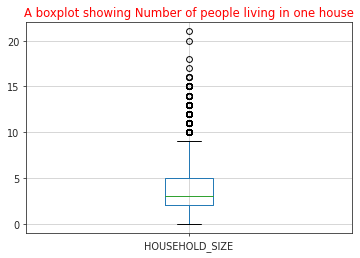

In [ ]:
#Checking for outliers
plt.figure(dpi = 70)
Finance.boxplot(['HOUSEHOLD_SIZE'])
plt.title("A boxplot showing Number of people living in one house", color = 'RED')
plt.show()



In [ ]:
#There are outliers but i decided to keep them as i felt removing them would greatly aalter my dataset

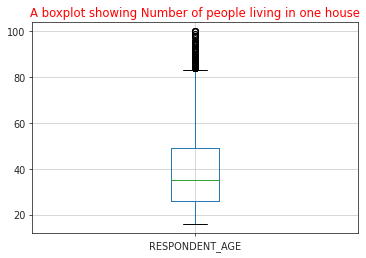

In [ ]:
plt.figure(dpi = 70)
Finance.boxplot(['RESPONDENT_AGE'])
plt.title("A boxplot showing Number of people living in one house", color = 'RED')
plt.show()


In [ ]:
#There are outliers but i decided to keep them as i felt removing them would greatly aalter my dataset

In [ ]:
# Dropping columns we do not need for this analysis
# 

Finance = Finance.drop(['UNIQUEID'], axis = 1)

# Exploratory Data Analysis

Univariate analysis

In [ ]:
#There are a couple of ways to conduct univariate analysis, such as;
    #Frequency distribution
    #Central tendency 
    #Dispersion

Frequency distribution

In [ ]:
pd.crosstab(index=Finance['CELL_PHONE_ACCESS'], columns=Finance['TYPE_OF_LOCATION'])

TYPE_OF_LOCATION,Rural,Urban
CELL_PHONE_ACCESS,,
No,3256,2753
Yes,11007,6324


In [ ]:
#There were more  interviewees with cell phone access in the rural area as compared to the urban area

In [ ]:
pd.crosstab(index=Finance['GENDER_OF_RESPONDENT'], columns='count') 

col_0,count
GENDER_OF_RESPONDENT,
Female,13766
Male,9574


In [ ]:
#There were more  female respondents than male

In [ ]:
# Frequency table of interviewee relationship_with_head of the house categories and their value counts

pd.crosstab(index = Finance['THE_RELATIONSHIP_WITH_HEAD'], columns = 'count')


col_0,count
THE_RELATIONSHIP_WITH_HEAD,
Child,2221
Head of Household,12729
Other non-relatives,189
Other relative,662
Parent,1069
Spouse,6470


In [ ]:
# Majority of the respondents were the head of the household followed by the spouse
# while the least constituted other non-relatives.

In [ ]:
# Frequency table of interviewee martial status categories and their value counts

pd.crosstab(index = Finance['MARITAL_STATUS'], columns = 'count')

col_0,count
MARITAL_STATUS,
Divorced/Seperated,2049
Dont know,8
Married/Living together,10698
Single/Never Married,7902
Widowed,2683


In [ ]:
# Majority of the respondents were married and living together with their spouses folowed by Single/Never married
#  the least constituted of people who did not know their marital status.

Central tendency

In [ ]:
#Mean - This represents the sum of all values in a dataset divided by the total number of the values.
# Mean of the RESPONDENT_AGE
Finance.RESPONDENT_AGE.mean()

38.80706940874036

In [ ]:
#Mean of the RESPONDENT_AGE  was 38.80706940874036

In [ ]:
#Mode - This represents the most frequently occurring value in a dataset
# Mode of the RESPONDENT_AGE
Finance.RESPONDENT_AGE.mode()

0    30.0
dtype: float64

In [ ]:
# Most occuring respondent age was 30.

In [ ]:
#Median - This is the middle value in a dataset when it is arranged in ascending order.
Finance.RESPONDENT_AGE.median()

35.0

In [ ]:
#Median of the respondents age was 35

Dispersion

In [ ]:
#Dispersion or measure of dispersion tells us the variation of the data from one another and gives us a clear idea of the distribution of the data.

#Common examples of dispersion measure are;

#Variance
#Standard deviation 
#Range
#Quartile deviation

In [ ]:
# RANGE
# difference between lowest and highest value
# find maximum value 
# find minimum value
# range = max - min

In [ ]:
# Range of the respondent age

ReAgeMax = Finance.RESPONDENT_AGE.max()
print(ReAgeMax)

ReAgeMin = Finance.RESPONDENT_AGE.min()
print(ReAgeMin)

RangeAge = ReAgeMax - ReAgeMin
RangeAge

100.0
16.0


84.0

In [ ]:
#Highest age of respondent was 100 the lowest was 16 therefore the range is 84

In [ ]:
# QUANTILES

# Quartiles are values that divide your data into quarters when data is sorted in an ascending order.

# There are three quartile values. 

# Q1: First quartile is the 25 percentile. 
# Q2: Second quartile is the 50 percentile...also...median of the data
# Q3: Third quartile is the 75 percentile. 


# THE INTERQUARTILE RANGE ...also ..IQR

# IQR = Q3 -Q1

In [ ]:
# Quantiles of the Respondent age

Finance["RESPONDENT_AGE"].quantile([0.25,0.5,0.75])


0.25    26.0
0.50    35.0
0.75    49.0
Name: RESPONDENT_AGE, dtype: float64

In [ ]:
#IQR of age
#Q3-Q1
#49-26=23

In [ ]:
# STANDARD DEVIATION

# Average distance between each obseravtion from the mean. 
# I.e., how data is spread out from mean. 
# A low std dev indicates that the data points tend to be close to the mean of the data set, 
# A high std dev indicates that the data points are spread out over a wider range of values.

In [ ]:
# Standard Deviation of the respondent age

Finance.RESPONDENT_AGE.std()


16.519904564514412

In [ ]:
# 16.52 is a high std dev hence the data points are not close to the mean (38.81) of the data set implying data points are widely spread out

In [ ]:
# VARIANCE 

# square of average distance between each observation and mean. 
# I.e. square of standard deviation. 
# It is a measure of how dispersed or spread out the set is, 

# If a data set has a variance of zero, then every member of it is the same. 
# If the variance is high, especially as a ratio to the mean, then the data have some very large dis-similarities amongst its members. 

In [ ]:
# Variance of the respondent_age

Finance.RESPONDENT_AGE.var()


272.90724682066417

In [ ]:
# var of 272.91 is very large compared to the mean of 38.81. This indicates that the age distribution have some very large dis-similarities.

In [ ]:
# SKEWNESS 

# A measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 
# In a perfect normal distribution, the tails on either side of the curve are exact mirror images of each other.
# A negative value means the distribution is negatively skewed.....or...skewed to the left
# A positive value means the distribution is positively skewed.....or...skewed to the right


In [ ]:
# Skewness of the RESPONDENT_AGE


Finance.RESPONDENT_AGE.skew()

0.8406145812311228

In [ ]:
# The age distribution is positively skewed  since its skewness is a positive value.

In [ ]:
# KURTOSIS 

# A measure of whether the data are heavy-tailed (profusion of outliers)
# or light-tailed (lack of outliers) relative to a normal distribution.
# If the kurtosis is close to 0, then a normal distribution is often assumed....These are called mesokurtic distributions.                        
# If the kurtosis is less than zero, then the distribution has light tails ......called a platykurtic distribution.  
# If the kurtosis is greater than zero, then the distribution has heavier tails .... called a leptokurtic distribution

In [ ]:
# Kurtosis of the respondent_age

Finance.RESPONDENT_AGE.kurt()



0.09826807013177241

In [ ]:
# The kurtosis is close to 0, hence a normal distribution is assumed....This is called mesokurtic distributions

Visualiziation in Univariate analysis

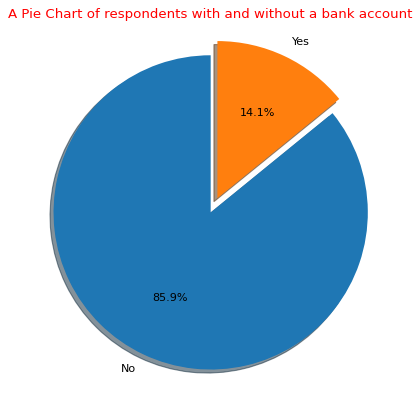

In [ ]:
# A pie chart of the respondents who had/ had no bank account

# grouping the data to be plotted
Account = Finance.HAS_A_BANK_ACCOUNT.value_counts()
Account

# accessing the data to plot
# labels
sizes= Account.index
sizes

# values
data = Account.values
data

# plotting the pie chart

plt.figure(figsize = (6,6), dpi = 80)
plt.pie(data, labels = sizes, autopct = '%2.1f%%', shadow = True, explode = (0.1,0), startangle = 90)
plt.axis('equal')
plt.title('A Pie Chart of respondents with and without a bank account', color = 'red')
plt.show()



In [ ]:
# the pie chart shows only a few respondents (14.1%) have a bank account 
# the majority (85.9%) do not have a bank account

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


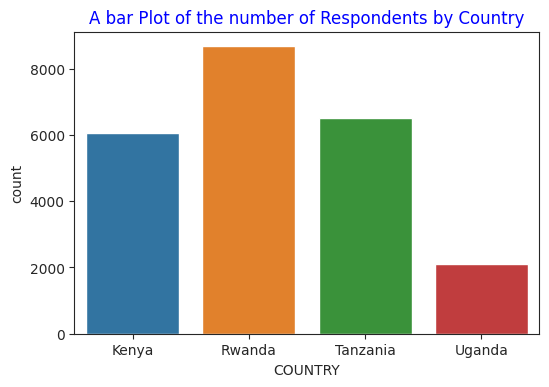

In [ ]:
# Plotting a bar plot of the the country where the interviewee resides

# Using seaborn to create a bar chart
# specifying our chart size
# Giving a title to our chart
# Displaying our chart

plt.figure(dpi = 100)
sns.set_style('ticks')
sns.countplot(Finance.COUNTRY)
plt.title('A bar Plot of the number of Respondents by Country', color = 'blue')
plt.show()



In [ ]:

# The bar chart shows that most respondents were from Rwanda 
# the least number of respondents were from Uganda


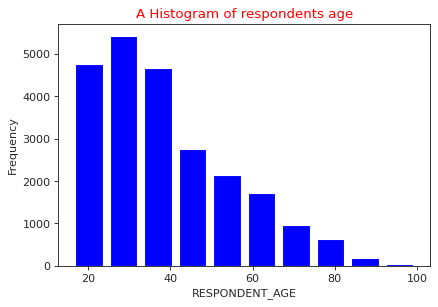

In [ ]:
# Histogram of respondent household_size
	 

# Using matplotlib to create a histogram
# labeling the x axis
# labeling the y axis
# Giving a title to our chart
# Displaying our chart



plt.figure(dpi = 80)
plt.hist(Finance['RESPONDENT_AGE'], bins = 10, histtype = 'bar', rwidth = 0.8, color = 'blue')
plt.xlabel('RESPONDENT_AGE')
plt.ylabel('Frequency')
plt.title('A Histogram of respondents age', color = 'red')
plt.show()



In [ ]:
# the histogram shows us that the respondent age distribution is skewed to the right
# this is because the tail is long to the right side

Bivariate analysis

In [ ]:
# Analysis of two different variables to find their causes and relationships between them 

Visualizations

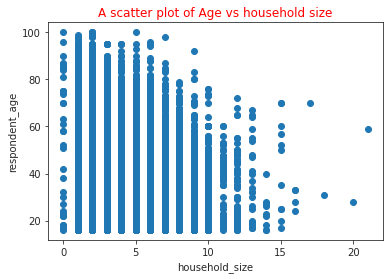

In [ ]:
# Plotting our scatterplot

plt.scatter(Finance['HOUSEHOLD_SIZE'], Finance['RESPONDENT_AGE'])
# Giving our scatterplot a title

plt.title('A scatter plot of Age vs household size', color = 'RED')
# Labelling our x axis
plt.xlabel('household_size')

# Labelling our y axis
plt.ylabel('respondent_age')
# Displaying our scatterplot
plt.show()

In [ ]:
# There is a weak correlation between age and household size in the dataset as the points are scattered throughout the graph.

In [ ]:
# Verifying my results
Finance.corr()

,YEAR,HOUSEHOLD_SIZE,RESPONDENT_AGE
YEAR,1.000000,-0.052484,-0.018554
HOUSEHOLD_SIZE,-0.052484,1.000000,-0.119671
RESPONDENT_AGE,-0.018554,-0.119671,1.000000


In [ ]:
#Line chart
 #Selecting a few observations in each column to plot a line graph
# There are too many observations(23340) to plot all so i have just to select a few
# using the iloc to select
# 40 rows  
# previewing the selection

FinanceLine = Finance.iloc[0:40,-7:-5] 
FinanceLine.head()

,HOUSEHOLD_SIZE,RESPONDENT_AGE
0,3.0,24.0
1,5.0,70.0
2,5.0,26.0
3,5.0,34.0
4,8.0,26.0


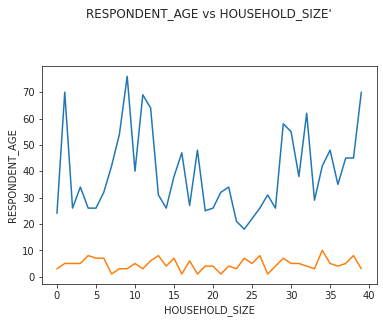

In [ ]:
# Line chart of the respondent age and household size for the first 40 rows only


# Plotting our line graph
plt.plot(FinanceLine[['RESPONDENT_AGE', 'HOUSEHOLD_SIZE']])

# Giving a title to our line graph
plt.title("RESPONDENT_AGE vs HOUSEHOLD_SIZE'", fontsize=12, y=1.2)

# Labelling the y-axis
plt.ylabel('RESPONDENT_AGE')

# Labelling the x-axis
plt.xlabel('HOUSEHOLD_SIZE')

# Displaying our graph
plt.show()

In [ ]:
# Correlation
# It is a statistical measure that describes the association between random variables.
# Correlation coefficients between -.20 and .20 are generally considered weak, 
# between .20 and .50 (positive or negative) are considered moderate, 
# and above .50 (positive or negative) are considered strong. 


In [ ]:
# Calculating the Pearson Correlation Co-efficient

Fcorr = Finance["RESPONDENT_AGE"].corr(Finance["HOUSEHOLD_SIZE"], method="pearson") 
print(Fcorr)

# We do not need to define the pearson, it calculates by default

Fcorr = Finance["RESPONDENT_AGE"].corr(Finance["HOUSEHOLD_SIZE"]) 
print(Fcorr)




-0.11967115234154871
-0.11967115234154871


In [ ]:
# The correlation coefficent of Age and Household is -0.12, 
# This implies that Age and Household have a very weak negative correlation

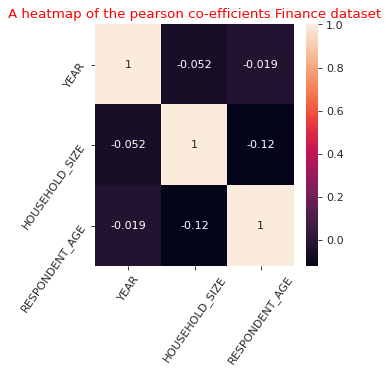

In [ ]:
# Heatmap can be used to display correlation as well

# defining our data
w = Finance.corr()
# figure size specifications
plt.figure(figsize = (4,4), dpi = 80)
# using the Seaborn Visualization library
sns.heatmap(w, xticklabels = w.columns, yticklabels=w.columns, annot = True)
# Rotating our x axis 
plt.xticks(rotation = 55)
# Rotating our y axis ticks
plt.yticks(rotation = 55)
# labelling the title#
plt.title('A heatmap of the pearson co-efficients Finance dataset', color = "red")
# displaying our chart
plt.show()

Multivariate analysis

In [ ]:
#Multivariate analysis is a type of analysis that is used to study more complex datasets than
 #what univariate analysis methods can handle

In [ ]:
Finance.columns

Index(['COUNTRY', 'YEAR', 'HAS_A_BANK_ACCOUNT', 'TYPE_OF_LOCATION',
       'CELL_PHONE_ACCESS', 'HOUSEHOLD_SIZE', 'RESPONDENT_AGE',
       'GENDER_OF_RESPONDENT', 'THE_RELATIONSHIP_WITH_HEAD', 'MARITAL_STATUS',
       'LEVEL_OF_EDUCATION', 'TYPE_OF_JOB'],
      dtype='object')

In [ ]:
Finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23521 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   COUNTRY                     23507 non-null  object 
 1   YEAR                        23521 non-null  int64  
 2   HAS_A_BANK_ACCOUNT          23485 non-null  object 
 3   TYPE_OF_LOCATION            23506 non-null  object 
 4   CELL_PHONE_ACCESS           23510 non-null  object 
 5   HOUSEHOLD_SIZE              23493 non-null  float64
 6   RESPONDENT_AGE              23487 non-null  float64
 7   GENDER_OF_RESPONDENT        23487 non-null  object 
 8   THE_RELATIONSHIP_WITH_HEAD  23517 non-null  object 
 9   MARITAL_STATUS              23489 non-null  object 
 10  LEVEL_OF_EDUCATION          23492 non-null  object 
 11  TYPE_OF_JOB                 23491 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.0+ MB


In [ ]:

# pd.get_dummies creates a new dataframe which consists of zeros and ones.
# categories into dummy variables with ones and zeros

FinanceDummy = pd.get_dummies(Finance[['COUNTRY', 'TYPE_OF_LOCATION','CELL_PHONE_ACCESS','GENDER_OF_RESPONDENT','THE_RELATIONSHIP_WITH_HEAD','MARITAL_STATUS', 'LEVEL_OF_EDUCATION', 'TYPE_OF_JOB']])
FinanceDummy.head(2)

,COUNTRY_Kenya,COUNTRY_Rwanda,COUNTRY_Tanzania,COUNTRY_Uganda,TYPE_OF_LOCATION_Rural,TYPE_OF_LOCATION_Urban,CELL_PHONE_ACCESS_No,CELL_PHONE_ACCESS_Yes,GENDER_OF_RESPONDENT_Female,GENDER_OF_RESPONDENT_Male,THE_RELATIONSHIP_WITH_HEAD_Child,THE_RELATIONSHIP_WITH_HEAD_Head of Household,THE_RELATIONSHIP_WITH_HEAD_Other non-relatives,THE_RELATIONSHIP_WITH_HEAD_Other relative,THE_RELATIONSHIP_WITH_HEAD_Parent,THE_RELATIONSHIP_WITH_HEAD_Spouse,MARITAL_STATUS_Divorced/Seperated,MARITAL_STATUS_Dont know,MARITAL_STATUS_Married/Living together,MARITAL_STATUS_Single/Never Married,MARITAL_STATUS_Widowed,LEVEL_OF_EDUCATION_6,LEVEL_OF_EDUCATION_No formal education,LEVEL_OF_EDUCATION_Other/Dont know/RTA,LEVEL_OF_EDUCATION_Primary education,LEVEL_OF_EDUCATION_Secondary education,LEVEL_OF_EDUCATION_Tertiary education,LEVEL_OF_EDUCATION_Vocational/Specialised training,TYPE_OF_JOB_Dont Know/Refuse to answer,TYPE_OF_JOB_Farming and Fishing,TYPE_OF_JOB_Formally employed Government,TYPE_OF_JOB_Formally employed Private,TYPE_OF_JOB_Government Dependent,TYPE_OF_JOB_Informally employed,TYPE_OF_JOB_No Income,TYPE_OF_JOB_Other Income,TYPE_OF_JOB_Remittance Dependent,TYPE_OF_JOB_Self employed
0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# A new dataset has been created
#For comparison i need either to merge or concatenate them for them to propoerly work

# The dummy variables will be on the right side of the dataset

# concatenating 

FinanceConcat = pd.concat([Finance, FinanceDummy], axis = 1)
FinanceConcat.head(3)

,COUNTRY,YEAR,HAS_A_BANK_ACCOUNT,TYPE_OF_LOCATION,CELL_PHONE_ACCESS,HOUSEHOLD_SIZE,RESPONDENT_AGE,GENDER_OF_RESPONDENT,THE_RELATIONSHIP_WITH_HEAD,MARITAL_STATUS,LEVEL_OF_EDUCATION,TYPE_OF_JOB,COUNTRY_Kenya,COUNTRY_Rwanda,COUNTRY_Tanzania,COUNTRY_Uganda,TYPE_OF_LOCATION_Rural,TYPE_OF_LOCATION_Urban,CELL_PHONE_ACCESS_No,CELL_PHONE_ACCESS_Yes,GENDER_OF_RESPONDENT_Female,GENDER_OF_RESPONDENT_Male,THE_RELATIONSHIP_WITH_HEAD_Child,THE_RELATIONSHIP_WITH_HEAD_Head of Household,THE_RELATIONSHIP_WITH_HEAD_Other non-relatives,THE_RELATIONSHIP_WITH_HEAD_Other relative,THE_RELATIONSHIP_WITH_HEAD_Parent,THE_RELATIONSHIP_WITH_HEAD_Spouse,MARITAL_STATUS_Divorced/Seperated,MARITAL_STATUS_Dont know,MARITAL_STATUS_Married/Living together,MARITAL_STATUS_Single/Never Married,MARITAL_STATUS_Widowed,LEVEL_OF_EDUCATION_6,LEVEL_OF_EDUCATION_No formal education,LEVEL_OF_EDUCATION_Other/Dont know/RTA,LEVEL_OF_EDUCATION_Primary education,LEVEL_OF_EDUCATION_Secondary education,LEVEL_OF_EDUCATION_Tertiary education,LEVEL_OF_EDUCATION_Vocational/Specialised training,TYPE_OF_JOB_Dont Know/Refuse to answer,TYPE_OF_JOB_Farming and Fishing,TYPE_OF_JOB_Formally employed Government,TYPE_OF_JOB_Formally employed Private,TYPE_OF_JOB_Government Dependent,TYPE_OF_JOB_Informally employed,TYPE_OF_JOB_No Income,TYPE_OF_JOB_Other Income,TYPE_OF_JOB_Remittance Dependent,TYPE_OF_JOB_Self employed
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


  Reduction Techniques

In [ ]:
#if you can reduce your many variables into 2 or 3 significant ones, 
#then you can visualize patterns much better.

Principal component analysis

In [ ]:


#Principal component analysis (PCA) is a statistical analysis that transforms a number of correlated variables into a smaller number of uncorrelated variables called principal components.
# PCA, is a statistical technique to convert high dimensional data to low dimensional data by 
# selecting the most important features that capture maximum information about the dataset.
# The features are selected on the basis of variance that they cause in the output. 
# The feature that causes highest variance is the first principal component. 
# The feature that is responsible for second highest variance is considered the second principal component, and so on.
# Note: principal components do not have any correlation with each other.
#Finally, the last point to remember before we start coding is that PCA is a statistical technique 
#and can only be applied to numeric data. Therefore, categorical features are required to be converted into numerical features before PCA can be applied.


In [ ]:
# Preprocessing steps


# Step 1
# The first preprocessing step is to divide the dataset into;
# a feature set: X, 
# and corresponding label: y.
X = FinanceConcat.drop(columns = ['COUNTRY','HAS_A_BANK_ACCOUNT','TYPE_OF_LOCATION','CELL_PHONE_ACCESS','HOUSEHOLD_SIZE','RESPONDENT_AGE','GENDER_OF_RESPONDENT','THE_RELATIONSHIP_WITH_HEAD','MARITAL_STATUS','LEVEL_OF_EDUCATION','TYPE_OF_JOB'],axis=1)
y = FinanceConcat['HAS_A_BANK_ACCOUNT']

In [ ]:
X.head(5)

,YEAR,COUNTRY_Kenya,COUNTRY_Rwanda,COUNTRY_Tanzania,COUNTRY_Uganda,TYPE_OF_LOCATION_Rural,TYPE_OF_LOCATION_Urban,CELL_PHONE_ACCESS_No,CELL_PHONE_ACCESS_Yes,GENDER_OF_RESPONDENT_Female,GENDER_OF_RESPONDENT_Male,THE_RELATIONSHIP_WITH_HEAD_Child,THE_RELATIONSHIP_WITH_HEAD_Head of Household,THE_RELATIONSHIP_WITH_HEAD_Other non-relatives,THE_RELATIONSHIP_WITH_HEAD_Other relative,THE_RELATIONSHIP_WITH_HEAD_Parent,THE_RELATIONSHIP_WITH_HEAD_Spouse,MARITAL_STATUS_Divorced/Seperated,MARITAL_STATUS_Dont know,MARITAL_STATUS_Married/Living together,MARITAL_STATUS_Single/Never Married,MARITAL_STATUS_Widowed,LEVEL_OF_EDUCATION_6,LEVEL_OF_EDUCATION_No formal education,LEVEL_OF_EDUCATION_Other/Dont know/RTA,LEVEL_OF_EDUCATION_Primary education,LEVEL_OF_EDUCATION_Secondary education,LEVEL_OF_EDUCATION_Tertiary education,LEVEL_OF_EDUCATION_Vocational/Specialised training,TYPE_OF_JOB_Dont Know/Refuse to answer,TYPE_OF_JOB_Farming and Fishing,TYPE_OF_JOB_Formally employed Government,TYPE_OF_JOB_Formally employed Private,TYPE_OF_JOB_Government Dependent,TYPE_OF_JOB_Informally employed,TYPE_OF_JOB_No Income,TYPE_OF_JOB_Other Income,TYPE_OF_JOB_Remittance Dependent,TYPE_OF_JOB_Self employed
0,2018,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Step 2
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Step 3
# Normalization
# PCA performs best with a normalized FEATURE SET (X). 
# We will perform standard scaler normalization to normalize our feature set

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# Step 4
# Applying PCA
# Performing PCA using Python's Scikit-Learn library.

# PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.

# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 

# The transform method returns the specified number of principal components.

# In the code below, we create a PCA object named pca
# We did not specify the number of components in the constructor. 
# Hence, all of the features in the feature set will be returned for both the training and test sets.
# 

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [ ]:
# Step 5
# Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# The line of code below will output the "explained variance ratio".
# 


explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.81637250e-02, 7.59958611e-02, 6.70236663e-02, 6.00336230e-02,
       5.41873046e-02, 4.55797100e-02, 4.14544887e-02, 3.73412493e-02,
       3.65900249e-02, 3.31781046e-02, 3.17434459e-02, 2.87835066e-02,
       2.79417533e-02, 2.71402095e-02, 2.64698416e-02, 2.63154479e-02,
       2.57048130e-02, 2.54979900e-02, 2.53310628e-02, 2.45560755e-02,
       2.40084442e-02, 2.38924439e-02, 2.31805119e-02, 2.21900439e-02,
       2.01717459e-02, 1.74407360e-02, 1.60500388e-02, 1.23444053e-02,
       1.17163154e-02, 9.67880630e-03, 1.02050606e-04, 8.29240494e-05,
       5.60706726e-05, 3.98945170e-05, 7.69022313e-06, 5.97481900e-06,
       1.25752620e-31, 6.70987834e-32, 9.69365644e-33])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# step 6
# Training and and Making Predictions 
# Here we use random forest classification for making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier.fit(X_train, y_train)

# predicting the Test set results

y_pred = classifier.predict(X_test)


ValueError: ignored

In [ ]:
# Step 7: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))